## Instructions

First install specific versions of the openai, langchain, and typing_extensions packages.

In [1]:
# Install the openai package, locked to version 1.27
!pip install openai==1.27

# Install the langchain package, locked to version 0.1.19
!pip install langchain==0.1.19

# Install the langchain-openai package, locked to version 0.1.6
!pip install langchain-openai==0.1.6

# Update the typing_extensions package, locked to version 4.11.0
!pip install typing_extensions==4.11.0

In [26]:
!pip install openai==1.27 langchain==0.1.19 langchain-openai==0.1.6 typing_extensions==4.11.0


  Using cached openai-1.27.0-py3-none-any.whl.metadata (21 kB)
Using cached openai-1.27.0-py3-none-any.whl (314 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.34.0
    Uninstalling openai-1.34.0:
      Successfully uninstalled openai-1.34.0


## Import necessary packages and dataset

In [54]:
import os
import openai
import pandas as pd
import plotly.express as px
import plotly.express as px
from langchain_openai import OpenAI, ChatOpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage
from IPython.display import display, Markdown


# Set the OpenAI API key from environment variables
# Put your key in ''
os.environ['OPENAI_API_KEY'] = ''
openai.api_key = os.getenv('OPENAI_API_KEY')


In [42]:
# Read the data from electric_cars.csv. Assign to electric_cars.
electric_cars = pd.read_csv("electric_cars.csv")

# Display a description of the numeric columns
print("Description of numeric columns\n")
display(electric_cars.describe())

# Display a description of the text (object) columns
print("Description of text columns\n")
display(electric_cars.describe(include="O"))

# Print the whole dataset
print("The electric cars dataset\n")
electric_cars

Description of numeric columns



,model_year,n_cars
count,26813.000000,26813.000000
mean,2019.375527,5.612166
std,3.286257,26.997325
min,1997.000000,1.000000
25%,2017.000000,1.000000
50%,2020.000000,2.000000
75%,2022.000000,4.000000
max,2024.000000,1514.000000


Description of text columns



,city,county,make,model,electric_vehicle_type
count,26813,26813,26813,26813,26813
unique,683,183,37,127,2
top,Bothell,King,TESLA,LEAF,Battery Electric Vehicle (BEV)
freq,479,7066,5071,1889,15885


The electric cars dataset



,city,county,model_year,make,model,electric_vehicle_type,n_cars
0,Seattle,King,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),1514
1,Seattle,King,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),1153
2,Seattle,King,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),1147
3,Seattle,King,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),1122
4,Bellevue,King,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),931
...,...,...,...,...,...,...,...
26808,Lakewood,Pierce,2022,BMW,IX,Battery Electric Vehicle (BEV),1
26809,Lakewood,Pierce,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),1
26810,Lakewood,Pierce,2022,FORD,TRANSIT,Battery Electric Vehicle (BEV),1
26811,Lakewood,Pierce,2022,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),1


## Step 2: The code sets up the necessary environment variables, defines system and user messages, and creates an OpenAI client for sending messages to GPT.

In [44]:
# A description of the dataset
dataset_description = """
You have a dataset about electric cars registered in Washington state, USA in 2020. It is available as a pandas DataFrame named `electric_cars`.

Each row in the dataset represents the count of the number of cars registered within a city, for a particular model.

The dataset contains the following columns.

- `city` (character): The city in which the registered owner resides.
- `county` (character): The county in which the registered owner resides.
- `model_year` (integer): The [model year](https://en.wikipedia.org/wiki/Model_year#United_States_and_Canada) of the car.
- `make` (character): The manufacturer of the car.
- `model` (character): The model of the car.
- `electric_vehicle_type` (character): Either "Plug-in Hybrid Electric Vehicle (PHEV)" or "Battery Electric Vehicle (BEV)".
- `n_cars` (integer): The count of the number of vehicles registered.
"""

# Create a task for the AI
suggest_questions = "Suggest some data analysis questions that could be answered with this dataset."


In [33]:
# Concatenate the dataset description and the request
msgs_suggest_questions = [
    SystemMessage(content="You are a data analysis expert."),
    HumanMessage(content=f"{dataset_description}\n\n{suggest_questions}")
]

# Create a ChatOpenAI object
chat = ChatOpenAI(model="gpt-4-0613")

# Pass your message to GPT
rsps_suggest_questions = chat.invoke(msgs_suggest_questions)

# Print the response
print("The whole response\n")
print(rsps_suggest_questions)

print("\n----\n")

# Print just the response's content
print("Just the response's content\n")
print(rsps_suggest_questions.content)

print("\n----\n")

# Print the type of the response
print("The type of the response\n")
print(type(rsps_suggest_questions))

The whole response

content='1. What is the total number of electric cars registered in Washington state in 2020?\n2. Which city has the highest number of electric cars registered? \n3. Which county has the highest number of electric cars registered?\n4. What is the most common model year of the electric cars registered? \n5. Which make and model of electric car is the most popular in Washington state? \n6. Which type of electric vehicle, either "Plug-in Hybrid Electric Vehicle (PHEV)" or "Battery Electric Vehicle (BEV)", is more popular in Washington state?\n7. Are there certain cities or counties that prefer one type of electric vehicle over the other?\n8. Are there any patterns or trends in the data that might suggest future growth or decline in electric car registrations?\n9. Are there any correlations between the city or county and the make or model of the car? \n10. What is the average number of cars per city or per county? \n11. Are there certain makes or models of electric cars

In [45]:
# Additional questions from the response
additional_questions = """
Write some Python code to answer the following questions using the dataset:
1. Find the top 5 most popular make/model combinations of electric car in Washington.
2. Which city has the highest number of electric cars registered? 
3. Which county has the highest number of electric cars registered?
4. What is the most common model year of the electric cars registered? 
5. Which make and model of electric car is the most popular in Washington state? 
6. Which type of electric vehicle, either "Plug-in Hybrid Electric Vehicle (PHEV)" or "Battery Electric Vehicle (BEV)", is more popular in Washington state?
7. Are there certain cities or counties that prefer one type of electric vehicle over the other?
"""

# Append the response and the new message to the previous messages
msgs_python_top_models = msgs_suggest_questions + [
    rsps_suggest_questions,
    HumanMessage(content=additional_questions)
]

# Pass your message to GPT
rsps_python_top_models = chat.invoke(msgs_python_top_models)

# Display the response's Markdown content
display(Markdown(rsps_python_top_models.content))

Here is some Python code using pandas to answer these questions. Please note that this is just an example code and might need adjustments according to the actual DataFrame.

```python
import pandas as pd

# Assuming that electric_cars is your DataFrame
# df = pd.read_csv('electric_cars.csv')  # Uncomment this line if you're reading from a CSV file

# 1. Top 5 most popular make/model combinations
popular_cars = electric_cars.groupby(['make', 'model']).sum()['n_cars']
popular_cars = popular_cars.sort_values(ascending=False)
print("Top 5 most popular make/model combinations:\n", popular_cars.head(5))

# 2. City with highest number of electric cars registered
top_city = electric_cars.groupby('city').sum()['n_cars'].idxmax()
print("City with highest number of electric cars registered:", top_city)

# 3. County with highest number of electric cars registered
top_county = electric_cars.groupby('county').sum()['n_cars'].idxmax()
print("County with highest number of electric cars registered:", top_county)

# 4. Most common model year of the electric cars registered
common_year = electric_cars['model_year'].mode()[0]
print("Most common model year of the electric cars registered:", common_year)

# 5. Most popular make and model of electric car
most_popular_car = popular_cars.idxmax()
print("Most popular make and model of electric car:", most_popular_car)

# 6. Most popular type of electric vehicle
popular_ev = electric_cars.groupby('electric_vehicle_type').sum()['n_cars'].idxmax()
print("Most popular type of electric vehicle:", popular_ev)

# 7. Cities or counties that prefer one type of electric vehicle over the other
cities_pref_ev = electric_cars.groupby(['city', 'electric_vehicle_type']).sum()['n_cars'].unstack().idxmax(axis=1)
counties_pref_ev = electric_cars.groupby(['county', 'electric_vehicle_type']).sum()['n_cars'].unstack().idxmax(axis=1)
print("Cities preferences for electric vehicle type:\n", cities_pref_ev)
print("Counties preferences for electric vehicle type:\n", counties_pref_ev)
```

This code provides the answers to your questions as per the dataset. Please note that the actual results will depend on the contents of your DataFrame.

In [41]:
# 1. Find the top 5 most popular make/model combinations of electric car in Washington.
popular_combinations = electric_cars.groupby(['make', 'model']).sum()['n_cars']
top_5_combinations = popular_combinations.sort_values(ascending=False).head(5)
print("The top 5 most popular make/model combinations of electric car in Washington: \n", top_5_combinations)

# 2. Which city has the highest number of electric cars registered?
city_counts = electric_cars.groupby('city').sum()['n_cars']
top_city = city_counts.idxmax()
print("\nCity with highest number of electric cars: \n", top_city)

# 3. Which county has the highest number of electric cars registered?
county_counts = electric_cars.groupby('county').sum()['n_cars']
top_county = county_counts.idxmax()
print("\nCounty with highest number of electric cars: \n", top_county)

# 4. What is the most common model year of the electric cars registered?
common_year = electric_cars['model_year'].mode()[0]
print("\nThe most common model year of the electric cars registered: \n", common_year)

# 5. Which make and model of electric car is the most popular in Washington state?
popular_car = electric_cars.groupby(['make', 'model']).sum()['n_cars'].idxmax()
print("\nMost popular make and model of electric car in Washington state: ", popular_car)

# 6. Which type of electric vehicle, either "Plug-in Hybrid Electric Vehicle (PHEV)" or "Battery Electric Vehicle (BEV)", is more popular in Washington state?
popular_type = electric_cars.groupby('electric_vehicle_type').sum()['n_cars'].idxmax()
print("\nMost popular type of electric vehicle in Washington state: \n", popular_type)

# 7. Are there certain cities or counties that prefer one type of electric vehicle over the other?
city_pref = electric_cars.groupby(['city', 'electric_vehicle_type']).sum()['n_cars'].idxmax()
county_pref = electric_cars.groupby(['county', 'electric_vehicle_type']).sum()['n_cars'].idxmax()
print("\nCity preference for type of electric vehicle: ", city_pref)
print("\nCounty preference for type of electric vehicle: \n", county_pref)

The top 5 most popular make/model combinations of electric car in Washington: 
 make       model  
TESLA      MODEL Y    28502
           MODEL 3    27708
NISSAN     LEAF       13186
TESLA      MODEL S     7611
CHEVROLET  BOLT EV     5733
Name: n_cars, dtype: int64

City with highest number of electric cars: 
 Seattle

County with highest number of electric cars: 
 King

The most common model year of the electric cars registered: 
 2023

Most popular make and model of electric car in Washington state:  ('TESLA', 'MODEL Y')

Most popular type of electric vehicle in Washington state: 
 Battery Electric Vehicle (BEV)

City preference for type of electric vehicle:  ('Seattle', 'Battery Electric Vehicle (BEV)')

County preference for type of electric vehicle: 
 ('King', 'Battery Electric Vehicle (BEV)')


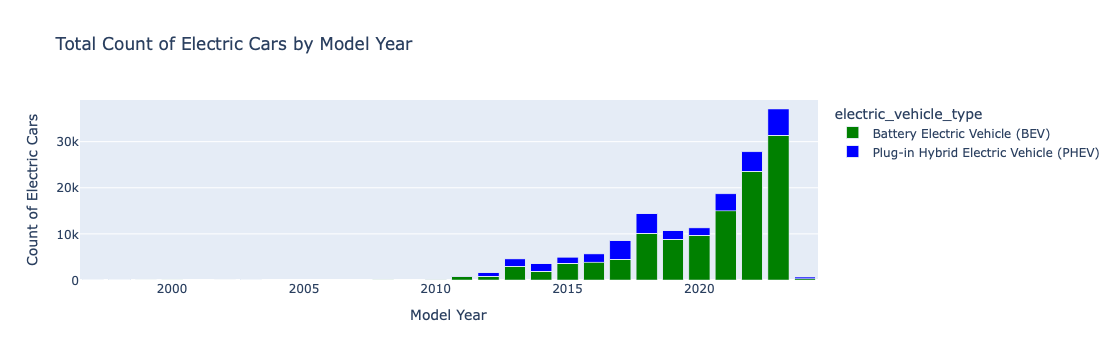

In [55]:
# Group the dataset by model year and electric vehicle type, and sum the number of cars for each combination
model_year_counts = electric_cars.groupby(['model_year', 'electric_vehicle_type'])['n_cars'].agg('sum').reset_index()

# Plot the bar plot using Plotly Express
fig = px.bar(model_year_counts,
             x='model_year', 
             y='n_cars', 
             color='electric_vehicle_type',
             title='Total Count of Electric Cars by Model Year',
             labels={'model_year': 'Model Year', 'n_cars': 'Count of Electric Cars'},
             color_discrete_map={'Plug-in Hybrid Electric Vehicle (PHEV)': 'blue',
                                 'Battery Electric Vehicle (BEV)': 'green'})

# Show the plot
fig.show()
